In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

print(train_images.shape)
print(test_images.shape)

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
             'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
(10000, 28, 28)


# Display Images

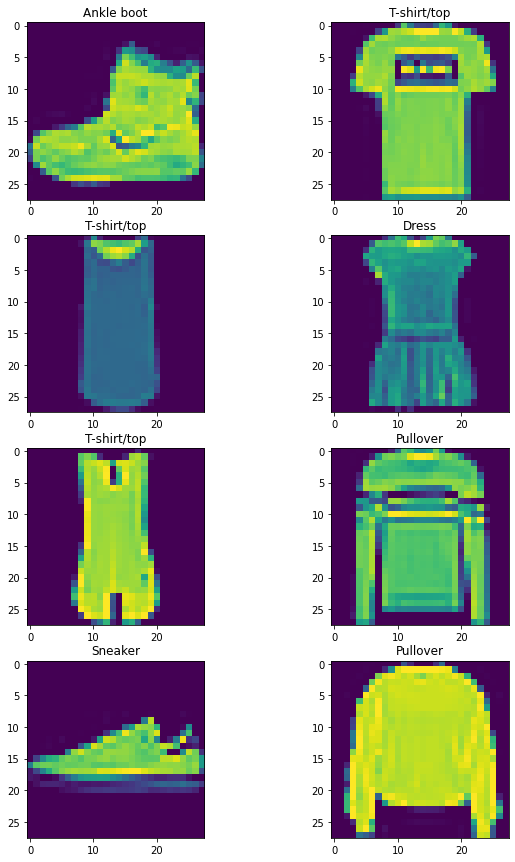

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(10,15))

for x in np.arange(0,8):
    row = int(x/2)
    col = int(x%2)
    axes[row, col].imshow(train_images[x])
    axes[row, col].set_title(class_name[train_labels[x]])

# Image Preprocessing

In [ ]:
train_images = train_images / 255.0
test_images = test_images /255.0

# Model construction

In [40]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 11.5777 - accuracy: 0.6663
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8138 - accuracy: 0.7085
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6538 - accuracy: 0.7567
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5974 - accuracy: 0.7828
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5525 - accuracy: 0.8137
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5237 - accuracy: 0.8275
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4857 - accuracy: 0.8380
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4887 - accuracy: 0.8394
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4852 - accuracy: 0.8371
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.46

# Evaluate and Predict

In [41]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.8265


[0.5642609000205994, 0.8264999985694885]

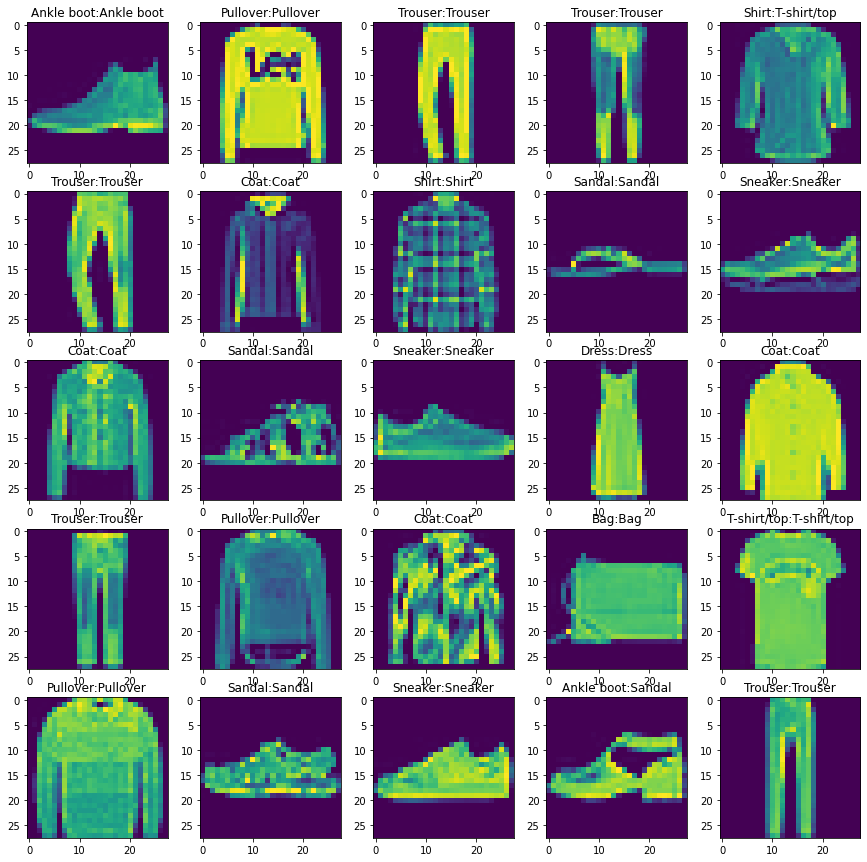

In [60]:
predictions = model.predict(test_images)
plt.figure(figsize=(15,15))
for x in np.arange(25):
    plt.subplot(5,5,x+1)
    plt.imshow(test_images[x])
    plt.title(class_name[test_labels[x]] + ':' + class_name[int(predictions[x].argmax())])